In [34]:
from skimage import io, img_as_float, img_as_ubyte
from matplotlib import pyplot as plt
import cv2
import numpy as np

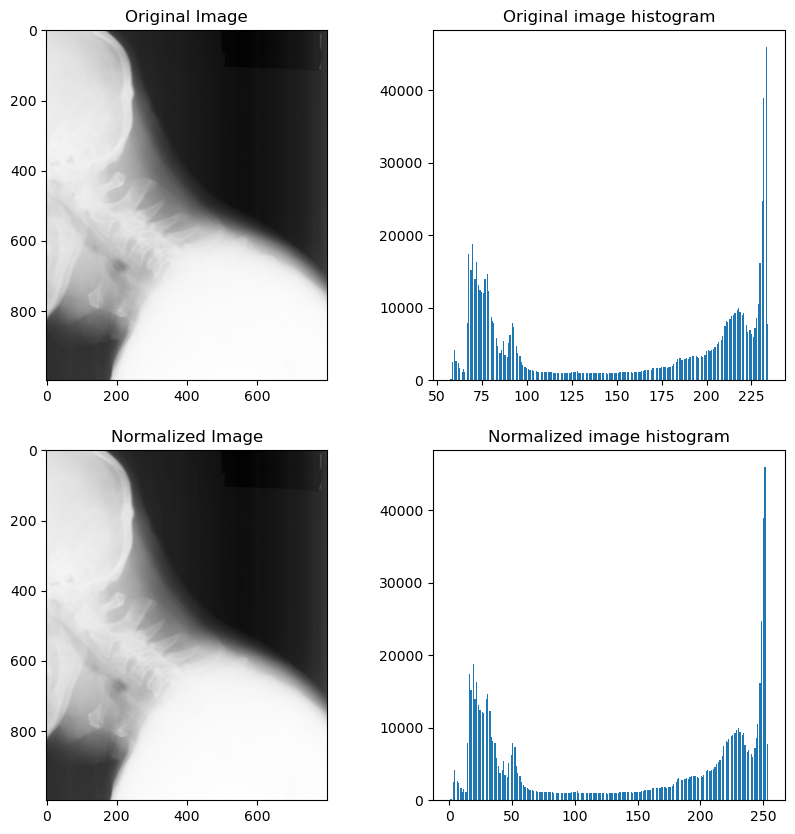

In [35]:
# Ex 1-2 

# Read image
dataDir = "data/"
imName = "vertebra.png"

fig, ax = plt.subplots(2, 2, figsize=(10, 10)) 
imgOrg = io.imread(dataDir + imName)

# Normalize the image
imgOrgNorm = cv2.normalize(imgOrg, None, 0, 255, norm_type=cv2.NORM_MINMAX) # type: ignore


# show images
ax[0][0].imshow(imgOrg, cmap='gray')
ax[0][0].set_title('Original Image')
ax[1][0].imshow(imgOrgNorm, cmap='gray')
ax[1][0].set_title('Normalized Image')

# show histogram of original image 
ax[0][1].hist(imgOrg.ravel(), bins=256)
ax[0][1].set_title('Original image histogram') 
ax[1][1].hist(imgOrgNorm.ravel(), bins=256)
ax[1][1].set_title('Normalized image histogram')

plt.show()

In [36]:
# Ex 3
minPixel = imgOrg.min()
maxPixel = imgOrg.max()
print(f"Min pixel value: {minPixel}")   
print(f"Max pixel value: {maxPixel}")

imgOrgFloat = img_as_float(imgOrg)
minPixel = imgOrgFloat.min()*255
maxPixel = imgOrgFloat.max()*255
print(f"Min pixel value: {minPixel}")
print(f"Max pixel value: {maxPixel}")

imgOrgUbyte = img_as_ubyte(imgOrgFloat)
minPixel = imgOrgUbyte.min()
maxPixel = imgOrgUbyte.max()
print(f"Min pixel value: {minPixel}")
print(f"Max pixel value: {maxPixel}")



Min pixel value: 57
Max pixel value: 235
Min pixel value: 56.99999999999999
Max pixel value: 235.0
Min pixel value: 57
Max pixel value: 235


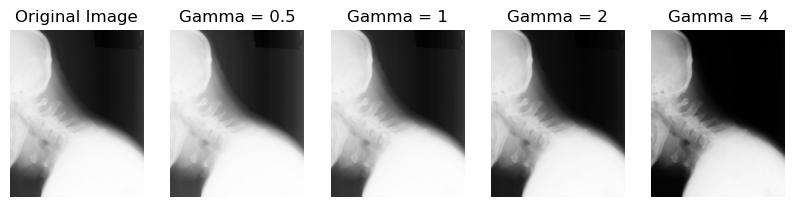

In [37]:
# Ex 7
from operator import index


def gamma_map(img, gamma):
    img = img_as_float(img)
    img = np.power(img, gamma)
    img = img_as_ubyte(img)
    return img

fig, ax = plt.subplots(1, 5, figsize=(10, 10))
gammas = 0.5, 1, 2, 4

# show Original image
ax[0].imshow(imgOrg, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# show images with different gamma values
for gamma in gammas:
    imgGamma = gamma_map(imgOrg, gamma)
    ax[gammas.index(gamma)+1].imshow(imgGamma, cmap='gray')
    ax[gammas.index(gamma)+1].set_title(f'Gamma = {gamma}')
    # axis off
    ax[gammas.index(gamma)+1].axis('off')
plt.show()

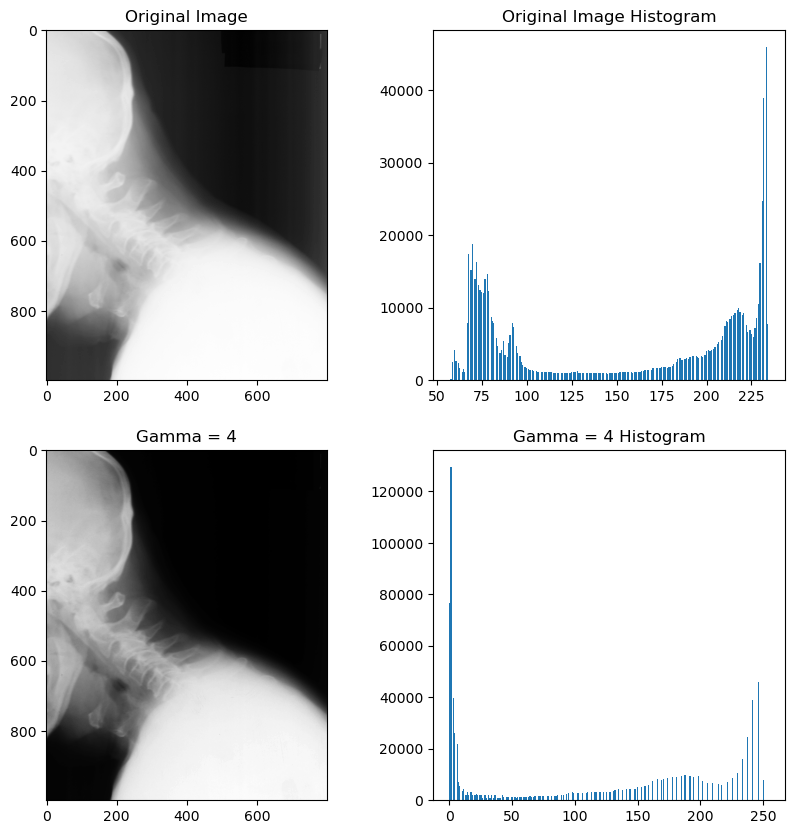

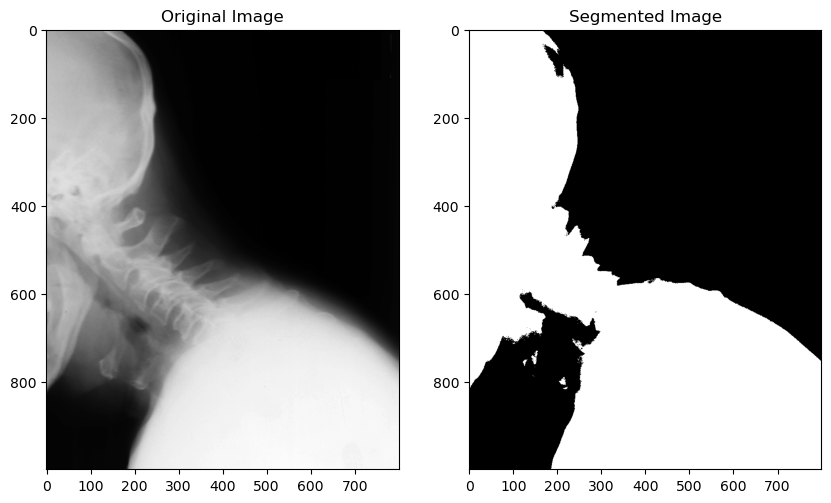

In [64]:
imgGamma = gamma_map(imgOrg, 4)
imgOrgNormGamma = cv2.normalize(imgGamma, None, 0, 255, norm_type=cv2.NORM_MINMAX) # type: ignore

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].imshow(imgOrg, cmap='gray')
ax[0][0].set_title('Original Image')       
ax[0][1].hist(imgOrg.ravel(), bins=256)
ax[0][1].set_title('Original Image Histogram')



ax[1][0].imshow(imgOrgNormGamma, cmap='gray')
ax[1][0].set_title('Gamma = 4')
ax[1][1].hist(imgOrgNormGamma.ravel(), bins=256)
ax[1][1].set_title('Gamma = 4 Histogram')
plt.show()


# do segemntation uing thresholding with otus method
mask = cv2.threshold(imgOrgNormGamma, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(imgOrgNormGamma, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Segmented Image')
plt.show()
